In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [92]:
df = pd.read_csv('2022_10_20_KBY_event_related.csv')
df.head()

,Trial,Size,User_Time,User_Input
0,Conjunction,12,0.65496,Target
1,Conjunction,8,0.59436,Target
2,No-target,8,0.71416,No-target
3,Conjunction,16,0.61436,Target
4,Conjunction,12,0.54308,Target


In [93]:
len(df)

640

In [94]:
for trial in df['Trial'].unique():
    print('Length of trial ', trial, ': ', len(df[df['Trial'] == trial]))

Length of trial  Conjunction :  160
Length of trial  No-target :  320
Length of trial  Pop-out :  160


# Clear data of wrong answers

In [95]:
for index, row in df.iterrows():
    if row['Trial'] in ('Pop-out', 'Conjunction') and row['User_Input'] != 'Target':
        df = df.drop(index)
    elif row['Trial'] == 'No-target' and row['User_Input'] == 'Target':
        df = df.drop(index)

In [96]:
len(df)

624

# Success rate

In [97]:
624/640

0.975

# Seperate trials

In [98]:
sizes = range(4, 17, 4)
means = {}
for trial in df['Trial'].unique():
    temp = df[df['Trial'] == trial]
    means[trial] = [ temp[temp['Size'] == s]['User_Time'].mean() for s in sizes ]

In [99]:
means

{'Conjunction': [0.5502945945945945,
  0.5611102631578945,
  0.5756152631578946,
  0.5951937500000002],
 'No-target': [0.667245512820513,
  0.6985058749999998,
  0.7083058974358976,
  0.7750075949367087],
 'Pop-out': [0.5324528947368423,
  0.5121646153846154,
  0.5156279999999999,
  0.531616923076923]}

# Plots

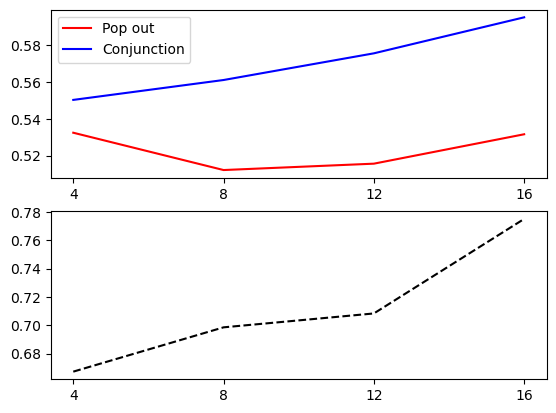

In [102]:
fig, axes = plt.subplots(2, 1)
plt.setp(axes, xticks=[4, 8, 12, 16])

axes[0].plot(x, means['Pop-out'], 'r', label = 'Pop out')
axes[0].plot(x, means['Conjunction'], 'b', label = 'Conjunction')
axes[0].legend()

axes[1].plot(x, means['No-target'], '--k', label = 'No target')

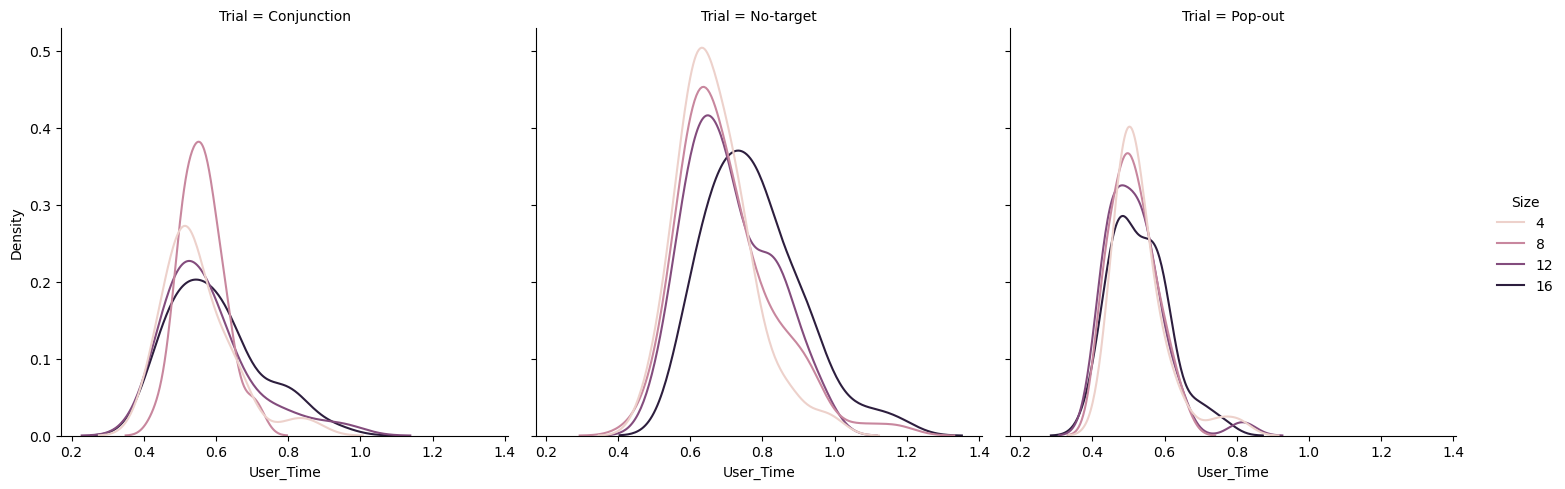

In [127]:
sns.displot(data=df, x='User_Time', hue='Size', col='Trial', kind='kde')

Text(0.5, 1.0, 'Violin plot for no-target trials')

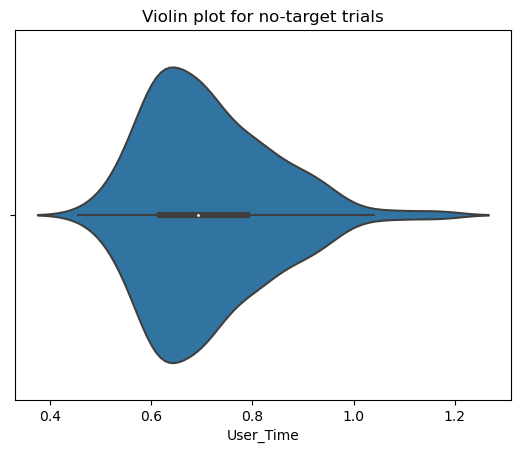

In [125]:
sns.violinplot(data=df[df['Trial'] == 'No-target'], x="User_Time")
plt.title('Violin plot for no-target trials')